In [2]:
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [3]:
groups_birds = pd.unique(birddata.bird_name)

In [5]:
groups_birds

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [12]:
temp = birddata.speed_2d[birddata.bird_name == "Sanne"]

In [16]:
mean_speeds = []
for name in groups_birds:
    temp = birddata.speed_2d[birddata.bird_name == name]
    mean_speeds.append(temp.mean(axis = 0))

In [19]:
mean_speeds

[2.3005445907278466, 2.9087263541396617, 2.4504341163584806]

In [21]:
mean_altitude = []
for name in groups_birds:
    temp = birddata.altitude[birddata.bird_name == name]
    mean_altitude.append(temp.mean(axis = 0))

In [22]:
mean_altitude

[60.249406415761555, 67.90047819705507, 29.159921919634357]

In [26]:
groups_birds = birddata.groupby("bird_name")
mean_speeds = groups_birds.speed_2d.mean()
mean_altitude = groups_birds.altitude.mean()

In [27]:
groups_birds

In [28]:
mean_altitude

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

In [29]:
mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

In [30]:
birddata.date_time = pd.to_datetime(birddata.date_time)

In [31]:
birddata.date_time.head

<bound method NDFrame.head of 0       2013-08-15 00:18:08+00:00
1       2013-08-15 00:48:07+00:00
2       2013-08-15 01:17:58+00:00
3       2013-08-15 01:47:51+00:00
4       2013-08-15 02:17:42+00:00
                   ...           
61915   2014-04-30 22:00:08+00:00
61916   2014-04-30 22:29:57+00:00
61917   2014-04-30 22:59:52+00:00
61918   2014-04-30 23:29:43+00:00
61919   2014-04-30 23:59:34+00:00
Name: date_time, Length: 61920, dtype: datetime64[ns, UTC]>

In [32]:
birddata["date"] = birddata.date_time.dt.date

In [33]:
birddata

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08+00:00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07+00:00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58+00:00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51+00:00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42+00:00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15
...,...,...,...,...,...,...,...,...,...
61915,11,2014-04-30 22:00:08+00:00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30
61916,6,2014-04-30 22:29:57+00:00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30
61917,5,2014-04-30 22:59:52+00:00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30
61918,16,2014-04-30 23:29:43+00:00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30


In [34]:
group_bydates = birddata.groupby("date")

In [35]:
group_bydates

In [38]:
mean_altitudes_perday = group_bydates.altitude.mean()

In [51]:
print(mean_altitudes_perday.get(key = '2013-09-12'))

None


In [52]:
mean_altitudes_perday[:30]

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
2013-08-20    184.461224
2013-08-21    171.546185
2013-08-22    114.172691
2013-08-23    144.716049
2013-08-24    101.446721
2013-08-25     93.162602
2013-08-26     75.995951
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
Name: altitude, dtype: float64

In [55]:
grouped_birdday = birddata.groupby(['bird_name', 'date'])
mean_altitudes_perday  = grouped_birdday.altitude.mean()

In [68]:
mean_altitudes_perday

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
                            ...    
Sanne      2014-04-26     17.116667
           2014-04-27     17.391892
           2014-04-28     58.876712
           2014-04-29     30.530120
           2014-04-30      4.361111
Name: altitude, Length: 770, dtype: float64

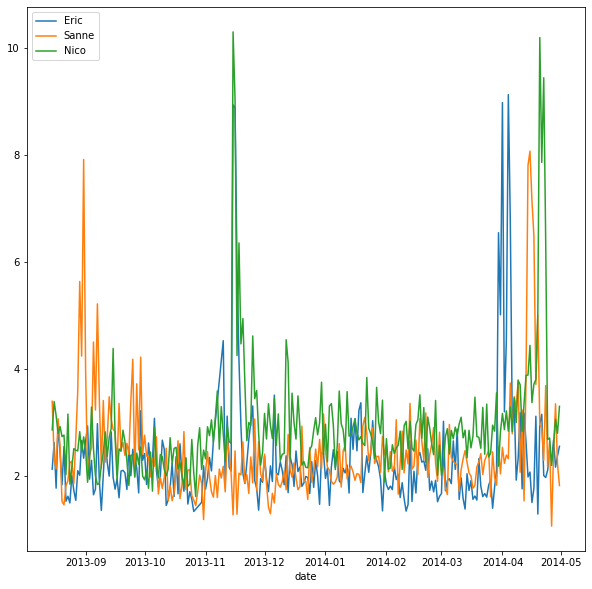

In [70]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]
plt.figure(figsize=(10,10))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()

In [95]:
nico_daily_speed[::-1][:30]

date
2014-04-30     3.297032
2014-04-29     2.793232
2014-04-28     3.055051
2014-04-27     2.582072
2014-04-26     2.192028
2014-04-25     2.705160
2014-04-24     2.674536
2014-04-23     6.384096
2014-04-22     9.445087
2014-04-21     7.861385
2014-04-20    10.196981
2014-04-19     5.061530
2014-04-18     3.798646
2014-04-17     3.713230
2014-04-16     3.366451
2014-04-15     4.437659
2014-04-14     3.882314
2014-04-13     3.878121
2014-04-12     3.341111
2014-04-11     2.829536
2014-04-10     3.703409
2014-04-09     3.780186
2014-04-08     2.995421
2014-04-07     3.455989
2014-04-06     2.824700
2014-04-05     3.283842
2014-04-04     2.832465
2014-04-03     3.212099
2014-04-02     2.861222
2014-04-01     3.163723
Name: speed_2d, dtype: float64